***TEXT CLASSIFICATION***

---
Rajarshi Karmakar




First we are cloning the github repo using this command

In [1]:
!git clone https://github.com/eshwarprasadS/CVAssignmentDataset.git

Cloning into 'CVAssignmentDataset'...
remote: Enumerating objects: 11, done.
remote: Counting objects: 100% (11/11), done.
remote: Compressing objects: 100% (11/11), done.
remote: Total 11 (delta 2), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (11/11), done.


In [2]:
%cd CVAssignmentDataset

/content/CVAssignmentDataset


Using pandas we are reading the dataset file

In [3]:
import pandas as pd
df=pd.read_csv('CVAssignmentDataset.csv')

using .head() method we are printing first 5 data from the dataframe

In [4]:
df.head()

,Class,Text
0,1,"Today, Senate Dems vote to #SaveTheInternet. P..."
1,1,RT @WinterHavenSun: Winter Haven resident / Al...
2,1,RT @NBCLatino: .@RepDarrenSoto noted that Hurr...
3,1,RT @NALCABPolicy: Meeting with @RepDarrenSoto ...
4,1,RT @Vegalteno: Hurricane season starts on June...


we have a mislabeled class in the dataset which we are removing by this command

In [5]:
df=df[df['Class']!='https://t.co/sbSljdw1Zw']

Using Seabord library we are visualizing how much of each class exists in the dataset

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


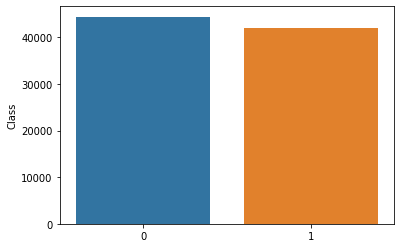

In [6]:
import seaborn as sns
x=df.Class.value_counts()
sns.barplot(x.index,x)

In [7]:
df[df['Class']=='0']

,Class,Text
42069,0,"It's #WastefulWednesday! \n\nToday, I introduc..."
42070,0,Today we honored all the heroic men &amp; wome...
42071,0,"RT @CongressmanRaja: Last week, @RepRalphNorma..."
42072,0,RT @TegaCayPD: Chief Parker was thankful to re...
42073,0,I visited the SC Highway Patrol to bring them ...
...,...,...
86456,0,Check out my op-ed on need for End Executive O...
86457,0,"Yesterday, Betty &amp; I had a great time lear..."
86458,0,We are forever grateful for the service and sa...
86459,0,Happy first day of school @CobbSchools! #CobbB...


now we are visualizing how many characters are there for each class

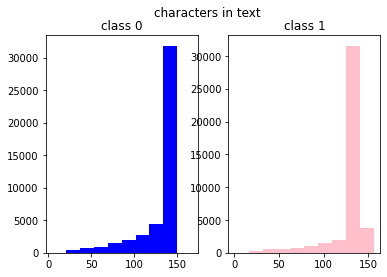

In [8]:
import matplotlib.pyplot as plt
fig,(axis1,axis2)=plt.subplots(1,2)
char_len=df[df['Class']=='0']['Text'].str.len()
axis1.hist(char_len,color='blue')
axis1.set_title('class 0')
char_len=df[df['Class']=='1']['Text'].str.len()
axis2.hist(char_len,color='pink')
axis2.set_title('class 1')
fig.suptitle('characters in text')
plt.show()


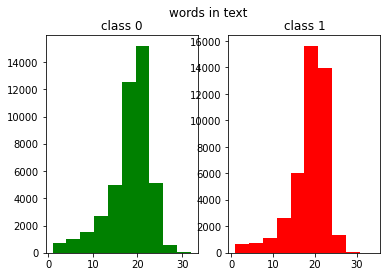

In [9]:
fig,(axis1,axis2)=plt.subplots(1,2)
char_len=df[df['Class']=='0']['Text'].str.split().map(lambda x:len(x))
axis1.hist(char_len,color='green')
axis1.set_title('class 0')
char_len=df[df['Class']=='1']['Text'].str.split().map(lambda x:len(x))
axis2.hist(char_len,color='red')
axis2.set_title('class 1')
fig.suptitle('words in text')
plt.show()

In [10]:
df['Class']=df['Class'].astype(int)

In [11]:
def create_corpus(target):
    corpus=[]
    
    for x in df[df['Class']==target]['Text'].str.split():
        for i in x:
            corpus.append(i)
    return corpus

In [12]:
from nltk.util import ngrams
from sklearn.feature_extraction.text import CountVectorizer


Now we are analysing most common bygrams in the data

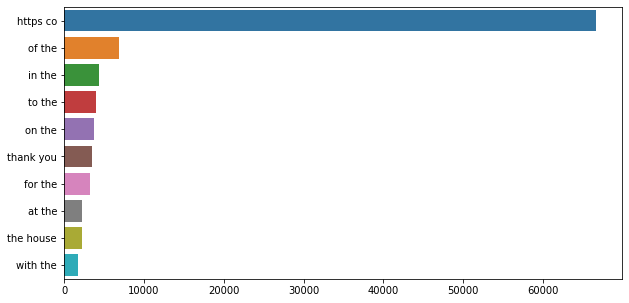

In [13]:
def get_top_bigrams(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
plt.figure(figsize=(10,5))
top_bigrams=get_top_bigrams(df['Text'])[:10]
x,y=map(list,zip(*top_bigrams))
sns.barplot(x=y,y=x)

We can see the dataset contents URLs.We have to remove these before traing the data

In [14]:
import re
def remove_URL(text):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'',text)
df['Text']=df['Text'].apply(lambda x : remove_URL(x))

We are removing any present emojis and puntaution from the dataset

In [15]:
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)
df['Text']=df['Text'].apply(lambda x: remove_emoji(x))    

In [16]:
import string
def remove_punct(text):
    table=str.maketrans('','',string.punctuation)
    return text.translate(table)
df['Text']=df['Text'].apply(lambda x : remove_punct(x))

Now to be able to using machine learning we have to transform the text data to set of numbers thats why we are using Tokenizer

In [75]:
vocab_size=10000

In [76]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
tokenizer=Tokenizer(num_words=vocab_size)
tokenizer.fit_on_texts(df['Text'])
max_len=50

Now we are splitting the dataset into training and testing data using sklearn library

In [95]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(df['Text'],df['Class'],test_size=0.2,random_state=1)
x_train,x_val,y_train,y_val=train_test_split(x_train,y_train,test_size=0.25,random_state=1)

In [96]:
print(max_len)

50


In [102]:
x_train_tokens=tokenizer.texts_to_sequences(x_train)
x_test_tokens=tokenizer.texts_to_sequences(x_test)
x_val_tokens=tokenizer.texts_to_sequences(x_val)

x_train_pad=pad_sequences(x_train_tokens,maxlen=max_len,padding='post')
x_test_pad=pad_sequences(x_test_tokens,maxlen=max_len,padding='post')
x_val_pad=pad_sequences(x_val_tokens,maxlen=max_len,padding='post')

Now we are ready to build the classification model using several layers

In [121]:
from keras.models import Sequential
from keras.layers import Dense,Embedding,LSTM,Bidirectional,Conv1D,MaxPooling1D,Dropout
from keras.layers.embeddings import Embedding
EMBEDDING_DIM=32
model=Sequential()
model.add(Embedding(vocab_size,EMBEDDING_DIM,input_length=50))
model.add(Conv1D(filters=32,kernel_size=2,padding='same'))
model.add(MaxPooling1D(pool_size=2))
model.add(Bidirectional(LSTM(256,return_sequences=True)))
model.add(Dropout(0.5))
model.add(Bidirectional(LSTM(256)))
model.add(Dropout(0.3))
model.add(Dense(1024,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [122]:
model.summary()

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_22 (Embedding)     (None, 50, 32)            320000    
_________________________________________________________________
conv1d_22 (Conv1D)           (None, 50, 32)            2080      
_________________________________________________________________
max_pooling1d_22 (MaxPooling (None, 25, 32)            0         
_________________________________________________________________
bidirectional_44 (Bidirectio (None, 25, 512)           591872    
_________________________________________________________________
dropout_88 (Dropout)         (None, 25, 512)           0         
_________________________________________________________________
bidirectional_45 (Bidirectio (None, 512)               1574912   
_________________________________________________________________
dropout_89 (Dropout)         (None, 512)             

our model contains 3.5M parameters which takes longer for training without GPU

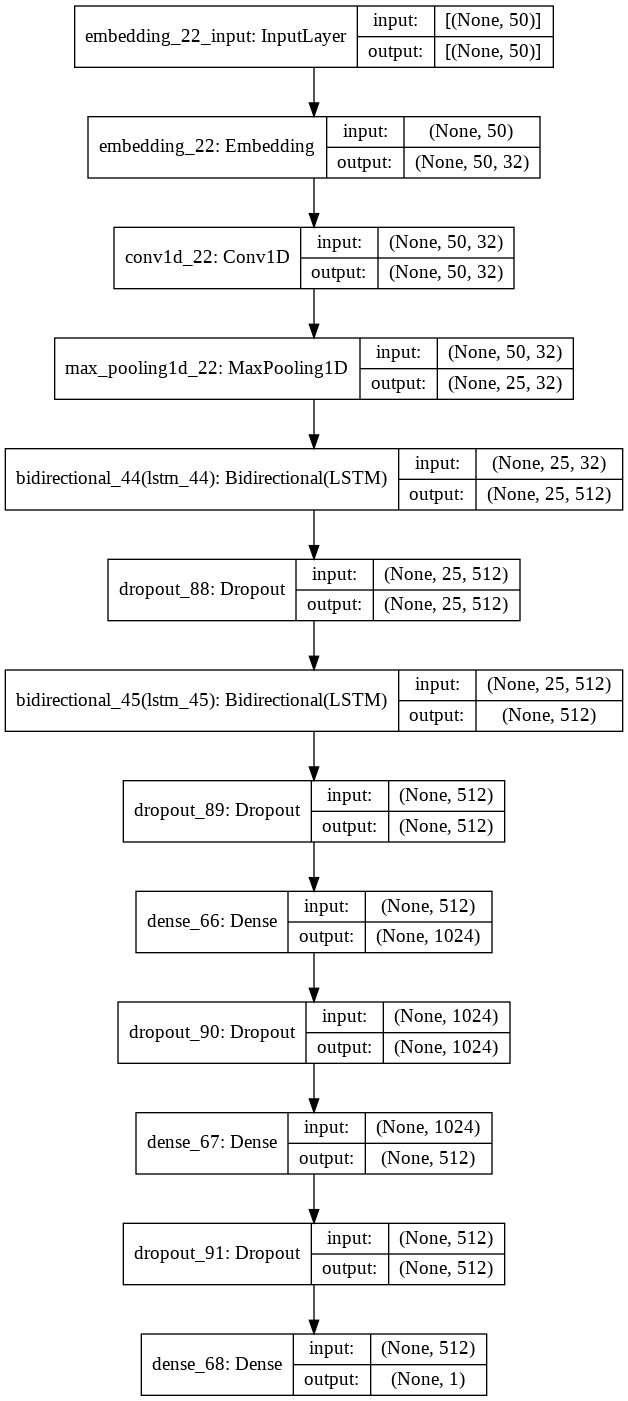

In [123]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model_plot4a.png', show_shapes=True, show_layer_names=True)

In [124]:
history=model.fit(x_train_pad,y_train,batch_size=128,epochs=25,validation_data=(x_val_pad,y_val),verbose=2)

Epoch 1/25
406/406 - 17s - loss: 0.5346 - accuracy: 0.7058 - val_loss: 0.4551 - val_accuracy: 0.7704
Epoch 2/25
406/406 - 11s - loss: 0.3834 - accuracy: 0.8152 - val_loss: 0.4484 - val_accuracy: 0.7768
Epoch 3/25
406/406 - 11s - loss: 0.3015 - accuracy: 0.8610 - val_loss: 0.4898 - val_accuracy: 0.7714
Epoch 4/25
406/406 - 11s - loss: 0.2076 - accuracy: 0.9097 - val_loss: 0.5835 - val_accuracy: 0.7608
Epoch 5/25
406/406 - 11s - loss: 0.1335 - accuracy: 0.9456 - val_loss: 0.7465 - val_accuracy: 0.7569
Epoch 6/25
406/406 - 11s - loss: 0.0867 - accuracy: 0.9659 - val_loss: 0.9728 - val_accuracy: 0.7581
Epoch 7/25
406/406 - 11s - loss: 0.0639 - accuracy: 0.9757 - val_loss: 1.0704 - val_accuracy: 0.7536
Epoch 8/25
406/406 - 11s - loss: 0.0524 - accuracy: 0.9799 - val_loss: 1.2992 - val_accuracy: 0.7524
Epoch 9/25
406/406 - 11s - loss: 0.0452 - accuracy: 0.9826 - val_loss: 1.2640 - val_accuracy: 0.7565
Epoch 10/25
406/406 - 11s - loss: 0.0391 - accuracy: 0.9852 - val_loss: 1.4352 - val_accura


we are getting 99% acuuracy by trining this model.Now we can plot accuracy over each epochs.

In [125]:
model_loss = pd.DataFrame(history.history)

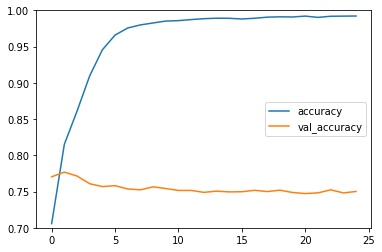

In [137]:
model_loss[['accuracy','val_accuracy']].plot(ylim=[0.7,1]);

In [138]:
y_pred=model.predict(x_test_pad)

In [139]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,matthews_corrcoef
print(classification_report(y_test,(y_pred>0.5).astype(int)))

              precision    recall  f1-score   support

           0       0.74      0.80      0.77      8824
           1       0.77      0.71      0.74      8468

    accuracy                           0.76     17292
   macro avg       0.76      0.76      0.76     17292
weighted avg       0.76      0.76      0.76     17292



In [140]:
print(accuracy_score(y_test,(y_pred>0.5).astype(int)))

0.7560143418922045


In [141]:
cm=confusion_matrix(y_test,(y_pred>0.5).astype(int))
print(cm)

[[7030 1794]
 [2425 6043]]


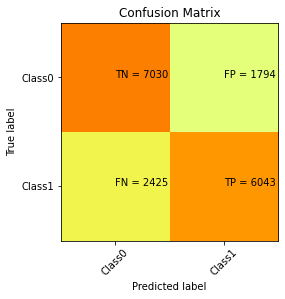

In [142]:
import matplotlib.pyplot as plt
import numpy as np
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Class0','Class1']
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
 
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

In [143]:
print(matthews_corrcoef(y_test,(y_pred>0.5).astype(int)))

0.5124587320551841


In [144]:
model.save('model.h5')

We can use the following code to download the weights of the model.So we can use these pretrained weights for predicting later.

In [145]:
from google.colab import files
files.download('model.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [146]:
files.download('model_plot4a.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>